Libraries imported successfully! 🚀
Dataset Shapes:
Raw data: (1277, 24)
Cleaned data: (1277, 43)
Encoded data: (1277, 66)
=== RAW DATA OVERVIEW ===
   id  number  nationwide_number                 name  \
0   1       1                  1        Gagarin, Yuri   
1   2       2                  2       Titov, Gherman   
2   3       3                  1  Glenn, John H., Jr.   
3   4       3                  1  Glenn, John H., Jr.   
4   5       4                  2  Carpenter, M. Scott   

             original_name   sex  year_of_birth     nationality  \
0  ГАГАРИН Юрий Алексеевич  male           1934  U.S.S.R/Russia   
1  ТИТОВ Герман Степанович  male           1935  U.S.S.R/Russia   
2      Glenn, John H., Jr.  male           1921            U.S.   
3      Glenn, John H., Jr.  male           1921            U.S.   
4      Carpenter, M. Scott  male           1925            U.S.   

  military_civilian               selection  ...  year_of_mission  \
0          military                  

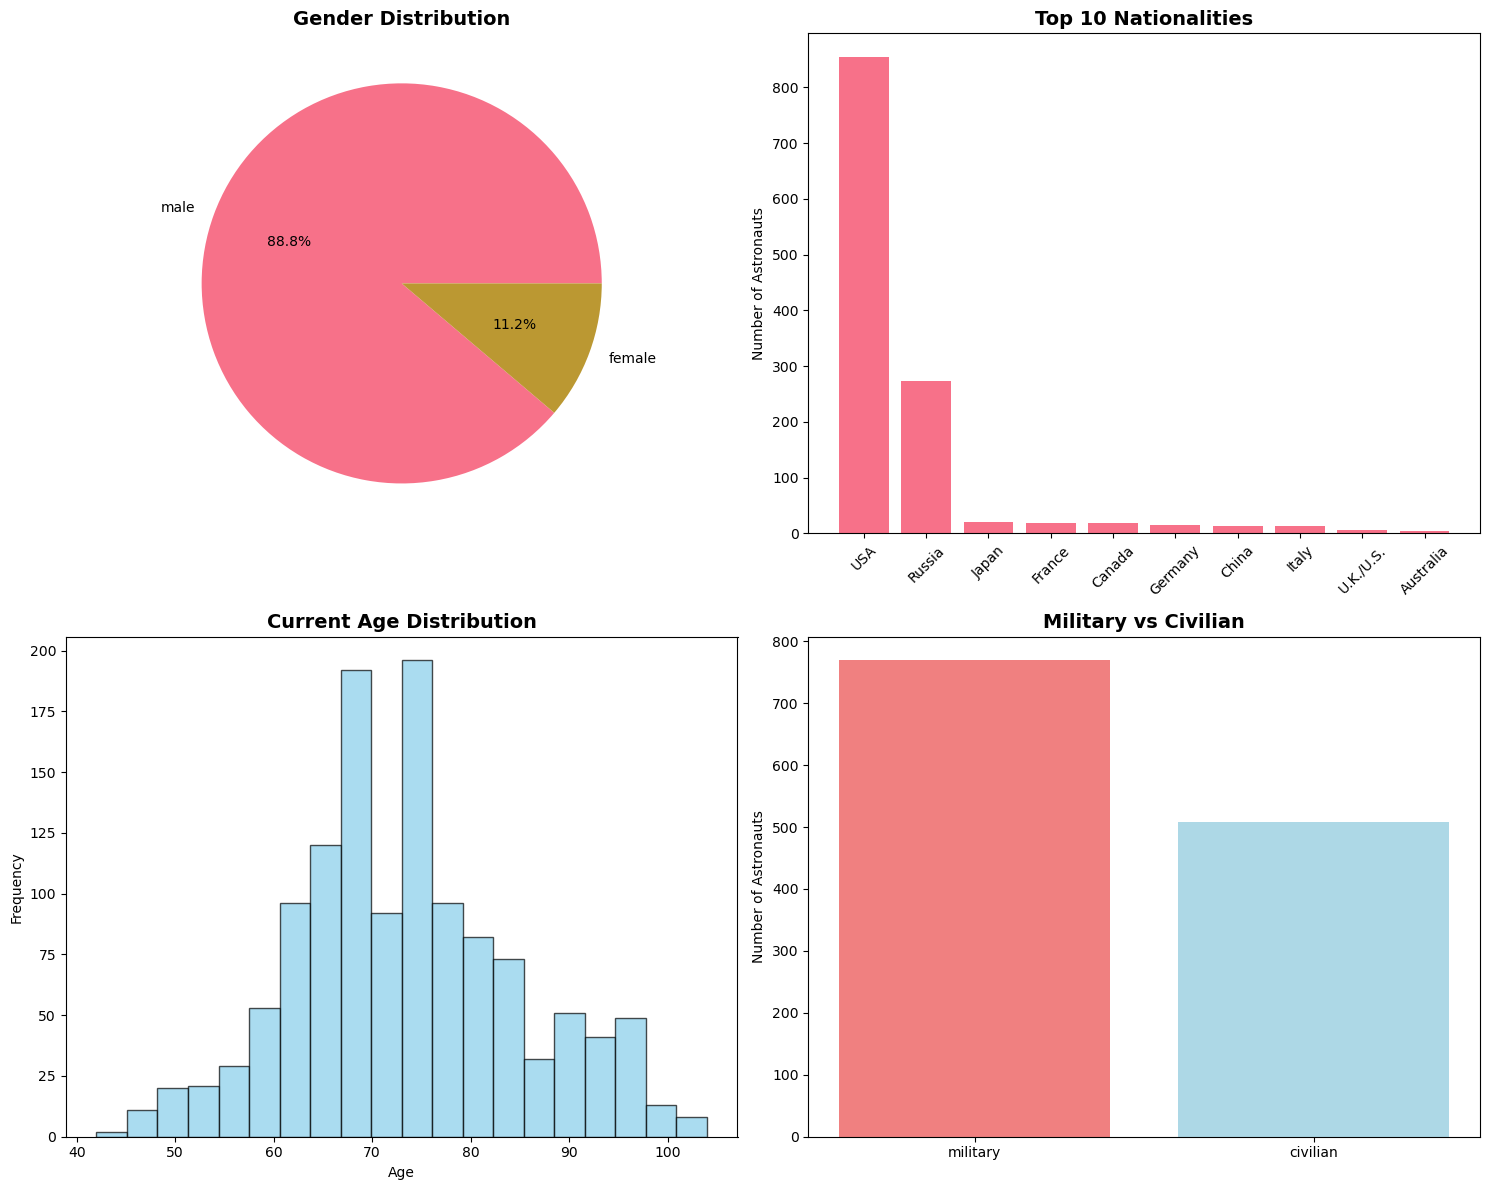

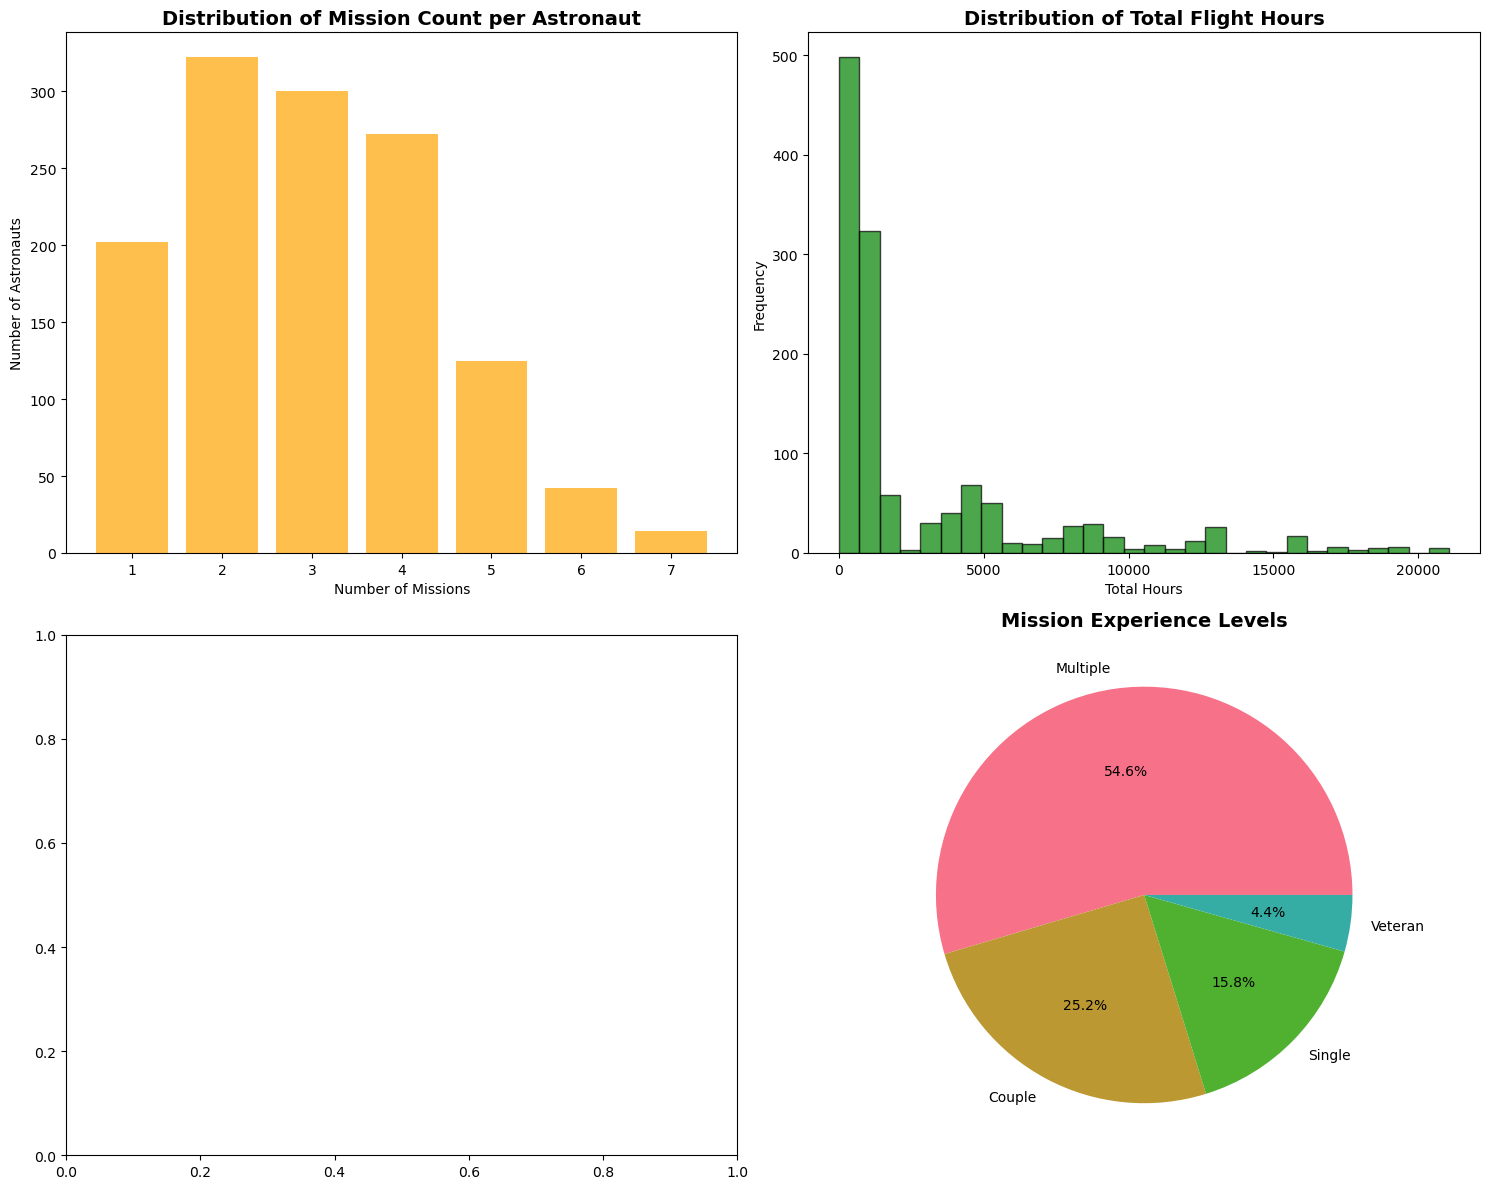

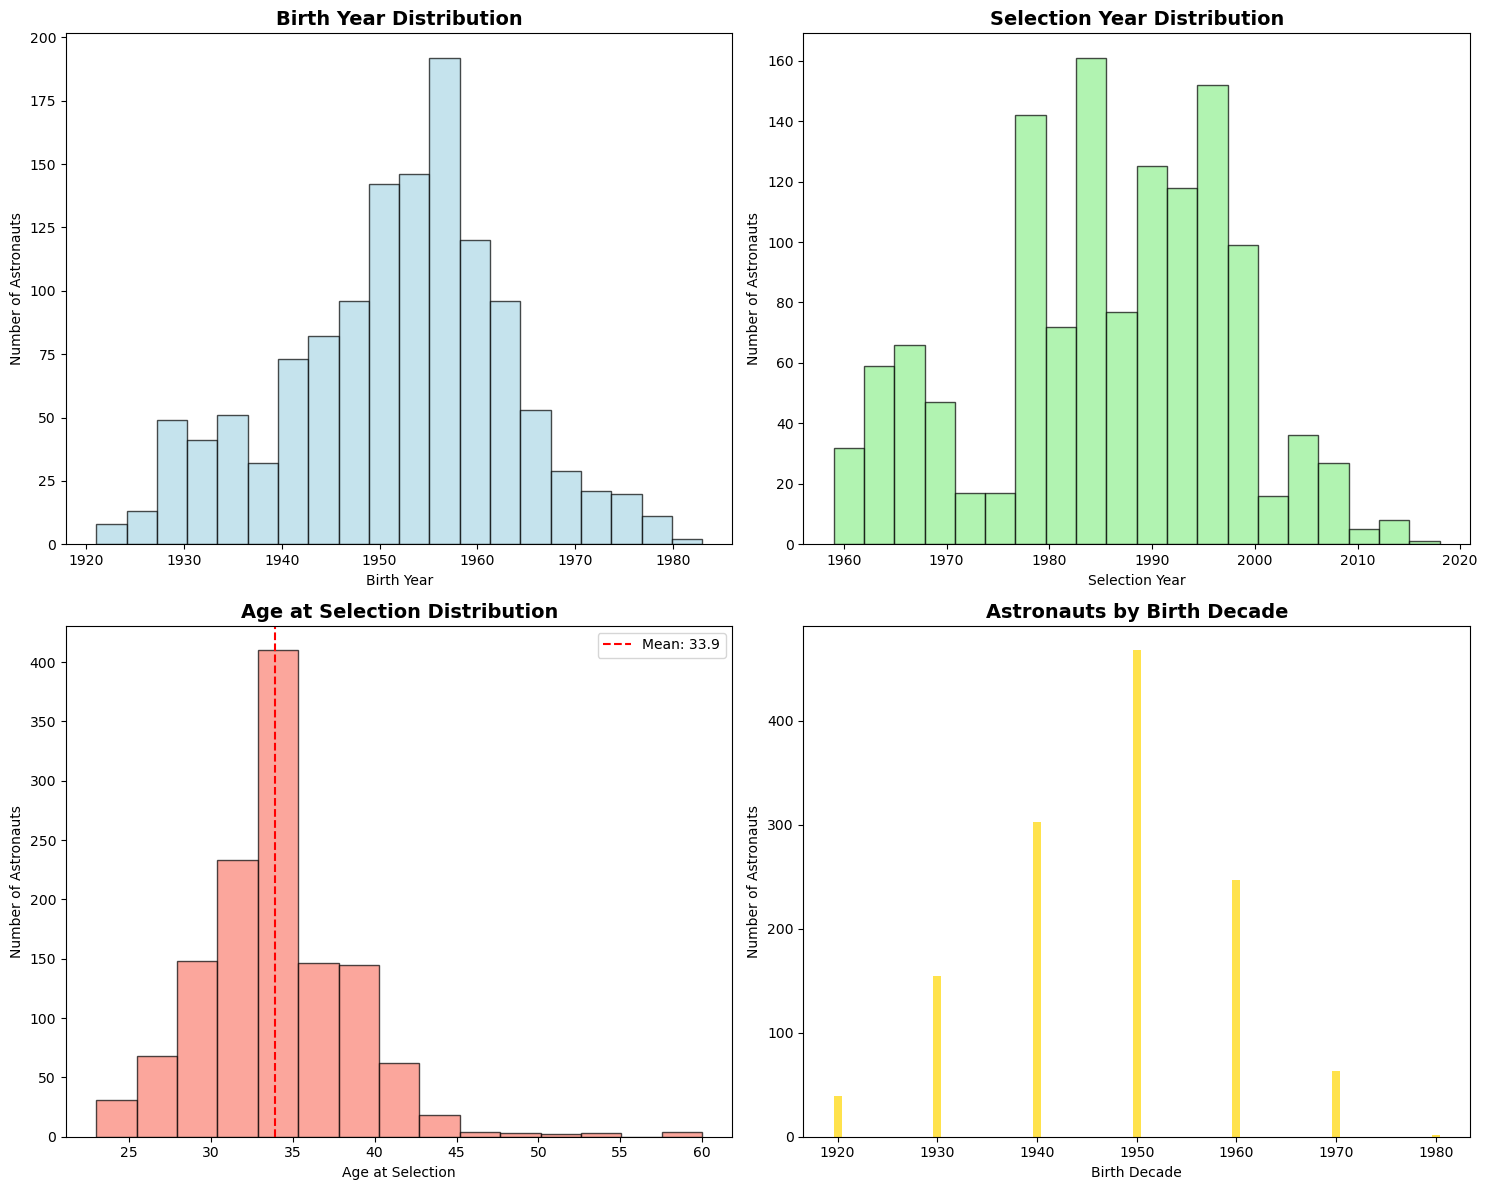

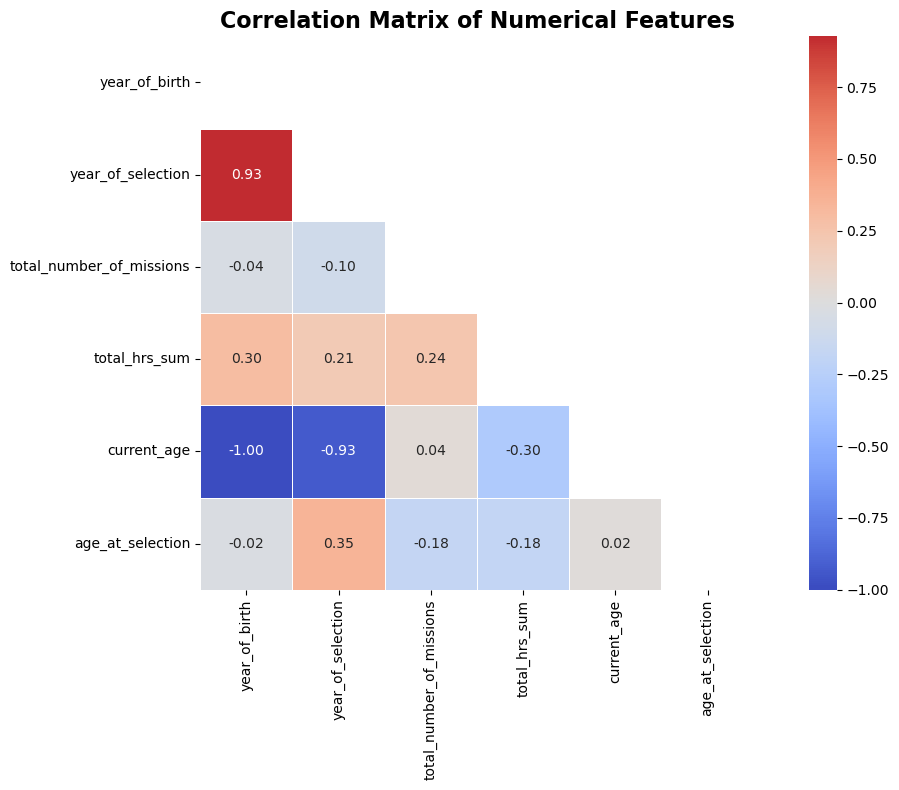

=== KEY INSIGHTS ===

👥 Gender Distribution:
   male: 1134 (88.8%)
   female: 143 (11.2%)

🚀 Mission Experience:
   Average missions per astronaut: 2.98
   Most missions by single astronaut: 7
   Veterans (>1 mission): 1075 (84.2%)

👨‍🚀 Age Demographics:
   Average current age: 73.3 years
   Age range: 42 - 104 years

🌍 Top 3 Space Nations:
   1. USA: 854 astronauts (66.9%)
   2. Russia: 273 astronauts (21.4%)
   3. Japan: 20 astronauts (1.6%)
=== DATA QUALITY ASSESSMENT ===

📊 Dataset Comparison:
   Raw dataset: 1277 rows, 24 columns
   Cleaned dataset: 1277 rows, 43 columns
   Features added: 19

🧹 Missing Values Handled:
   Before preprocessing: 13 missing values
   After preprocessing: 7 missing values
   Missing values handled: 6

✨ Data Preprocessing Success!
   The dataset is now ready for advanced analysis and machine learning!


In [5]:
# Astronaut Database - Exploratory Data Analysis
# Save this as: notebooks/astronaut_eda.ipynb

# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully! 🚀")

# Cell 2: Load Data
# Load all three versions of the dataset
df_raw = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\astro_dataprepro_project\astronauts.csv")
df_clean = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\astro_dataprepro_project\astronaut_database_preprocessed.csv")
df_encoded = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\astro_dataprepro_project\astronaut_database_encoded.csv")

print("Dataset Shapes:")
print(f"Raw data: {df_raw.shape}")
print(f"Cleaned data: {df_clean.shape}")
print(f"Encoded data: {df_encoded.shape}")

# Cell 3: Basic Data Overview
print("=== RAW DATA OVERVIEW ===")
print(df_raw.head())
print(f"\nColumns: {list(df_raw.columns)}")
print(f"\nData types:\n{df_raw.dtypes}")
print(f"\nMissing values:\n{df_raw.isnull().sum()}")

# Cell 4: Cleaned Data Overview
print("=== CLEANED DATA OVERVIEW ===")
print(df_clean.head())
print(f"\nNew columns created: {set(df_clean.columns) - set(df_raw.columns)}")

# Cell 5: Demographics Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gender distribution
if 'sex' in df_clean.columns:
    gender_counts = df_clean['sex'].value_counts()
    axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    axes[0,0].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# Nationality distribution (top 10)
if 'nationality' in df_clean.columns:
    top_nations = df_clean['nationality'].value_counts().head(10)
    axes[0,1].bar(range(len(top_nations)), top_nations.values)
    axes[0,1].set_xticks(range(len(top_nations)))
    axes[0,1].set_xticklabels(top_nations.index, rotation=45)
    axes[0,1].set_title('Top 10 Nationalities', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Number of Astronauts')

# Age distribution
if 'current_age' in df_clean.columns:
    axes[1,0].hist(df_clean['current_age'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1,0].set_title('Current Age Distribution', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Age')
    axes[1,0].set_ylabel('Frequency')

# Military vs Civilian
if 'military_civilian' in df_clean.columns:
    mil_counts = df_clean['military_civilian'].value_counts()
    axes[1,1].bar(mil_counts.index, mil_counts.values, color=['lightcoral', 'lightblue'])
    axes[1,1].set_title('Military vs Civilian', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Number of Astronauts')

plt.tight_layout()
plt.show()

# Cell 6: Mission Experience Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Mission count distribution
if 'total_number_of_missions' in df_clean.columns:
    mission_counts = df_clean['total_number_of_missions'].value_counts().sort_index()
    axes[0,0].bar(mission_counts.index, mission_counts.values, color='orange', alpha=0.7)
    axes[0,0].set_title('Distribution of Mission Count per Astronaut', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Number of Missions')
    axes[0,0].set_ylabel('Number of Astronauts')

# Total flight hours
if 'total_hrs_sum' in df_clean.columns:
    axes[0,1].hist(df_clean['total_hrs_sum'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].set_title('Distribution of Total Flight Hours', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Total Hours')
    axes[0,1].set_ylabel('Frequency')

# EVA hours distribution
if 'eva_hrs_sum' in df_clean.columns:
    eva_data = df_clean['eva_hrs_sum'].dropna()
    eva_nonzero = eva_data[eva_data > 0]
    
    axes[1,0].hist(eva_nonzero, bins=20, alpha=0.7, color='purple', edgecolor='black')
    axes[1,0].set_title(f'EVA Hours Distribution (Non-zero values)\nTotal with EVA: {len(eva_nonzero)}', 
                       fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('EVA Hours')
    axes[1,0].set_ylabel('Frequency')

# Mission experience categories
if 'mission_experience_level' in df_clean.columns:
    exp_counts = df_clean['mission_experience_level'].value_counts()
    axes[1,1].pie(exp_counts.values, labels=exp_counts.index, autopct='%1.1f%%')
    axes[1,1].set_title('Mission Experience Levels', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Cell 7: Time-based Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Birth year distribution
if 'year_of_birth' in df_clean.columns:
    birth_years = df_clean['year_of_birth'].dropna()
    axes[0,0].hist(birth_years, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0,0].set_title('Birth Year Distribution', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Birth Year')
    axes[0,0].set_ylabel('Number of Astronauts')

# Selection year distribution
if 'year_of_selection' in df_clean.columns:
    selection_years = df_clean['year_of_selection'].dropna()
    axes[0,1].hist(selection_years, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('Selection Year Distribution', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Selection Year')
    axes[0,1].set_ylabel('Number of Astronauts')

# Age at selection
if 'age_at_selection' in df_clean.columns:
    age_selection = df_clean['age_at_selection'].dropna()
    axes[1,0].hist(age_selection, bins=15, alpha=0.7, color='salmon', edgecolor='black')
    axes[1,0].set_title('Age at Selection Distribution', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Age at Selection')
    axes[1,0].set_ylabel('Number of Astronauts')
    axes[1,0].axvline(age_selection.mean(), color='red', linestyle='--', 
                     label=f'Mean: {age_selection.mean():.1f}')
    axes[1,0].legend()

# Decade analysis
if 'birth_decade' in df_clean.columns:
    decade_counts = df_clean['birth_decade'].value_counts().sort_index()
    axes[1,1].bar(decade_counts.index, decade_counts.values, color='gold', alpha=0.7)
    axes[1,1].set_title('Astronauts by Birth Decade', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Birth Decade')
    axes[1,1].set_ylabel('Number of Astronauts')

plt.tight_layout()
plt.show()

# Cell 8: Correlation Analysis
# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_cols = [col for col in numerical_cols if col in [
    'year_of_birth', 'year_of_selection', 'total_number_of_missions', 
    'total_hrs_sum', 'eva_hrs_sum', 'current_age', 'age_at_selection'
]]

if len(correlation_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_clean[correlation_cols].corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Cell 9: Advanced Insights
print("=== KEY INSIGHTS ===")

# Gender insights
if 'sex' in df_clean.columns:
    gender_counts = df_clean['sex'].value_counts()
    print(f"\n👥 Gender Distribution:")
    for gender, count in gender_counts.items():
        pct = (count/len(df_clean))*100
        print(f"   {gender}: {count} ({pct:.1f}%)")

# Experience insights
if 'total_number_of_missions' in df_clean.columns:
    mission_stats = df_clean['total_number_of_missions'].describe()
    print(f"\n🚀 Mission Experience:")
    print(f"   Average missions per astronaut: {mission_stats['mean']:.2f}")
    print(f"   Most missions by single astronaut: {mission_stats['max']:.0f}")
    veteran_count = len(df_clean[df_clean['total_number_of_missions'] > 1])
    print(f"   Veterans (>1 mission): {veteran_count} ({(veteran_count/len(df_clean))*100:.1f}%)")

# Age insights
if 'current_age' in df_clean.columns:
    age_stats = df_clean['current_age'].describe()
    print(f"\n👨‍🚀 Age Demographics:")
    print(f"   Average current age: {age_stats['mean']:.1f} years")
    print(f"   Age range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")

# EVA insights
if 'eva_hrs_sum' in df_clean.columns:
    eva_astronauts = len(df_clean[df_clean['eva_hrs_sum'] > 0])
    total_eva_hours = df_clean['eva_hrs_sum'].sum()
    print(f"\n🌌 Spacewalk (EVA) Experience:")
    print(f"   Astronauts with EVA experience: {eva_astronauts} ({(eva_astronauts/len(df_clean))*100:.1f}%)")
    print(f"   Total EVA hours recorded: {total_eva_hours:.1f} hours")
    if eva_astronauts > 0:
        avg_eva = df_clean[df_clean['eva_hrs_sum'] > 0]['eva_hrs_sum'].mean()
        print(f"   Average EVA hours per spacewalker: {avg_eva:.1f} hours")

# Nationality insights
if 'nationality' in df_clean.columns:
    top_3_nations = df_clean['nationality'].value_counts().head(3)
    print(f"\n🌍 Top 3 Space Nations:")
    for i, (nation, count) in enumerate(top_3_nations.items(), 1):
        pct = (count/len(df_clean))*100
        print(f"   {i}. {nation}: {count} astronauts ({pct:.1f}%)")

# Cell 10: Data Quality Report
print("=== DATA QUALITY ASSESSMENT ===")

print(f"\n📊 Dataset Comparison:")
print(f"   Raw dataset: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")
print(f"   Cleaned dataset: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print(f"   Features added: {df_clean.shape[1] - df_raw.shape[1]}")

print(f"\n🧹 Missing Values Handled:")
raw_missing = df_raw.isnull().sum().sum()
clean_missing = df_clean.isnull().sum().sum()
print(f"   Before preprocessing: {raw_missing} missing values")
print(f"   After preprocessing: {clean_missing} missing values")
print(f"   Missing values handled: {raw_missing - clean_missing}")

print(f"\n✨ Data Preprocessing Success!")
print(f"   The dataset is now ready for advanced analysis and machine learning!")